
### **1. Image Filtering**
   - **1.1 Introduction to Image Filtering**
     - Definition and purpose of image filtering.
     - Applications in image processing (e.g., noise reduction, edge detection, blurring).
   - **1.2 Types of Filters**
     - Linear Filters (e.g., Gaussian, Mean).
     - Non-linear Filters (e.g., Median, Bilateral).
   - **1.3 Filter Kernels**
     - Explanation of kernel matrices.
     - Common kernel examples (e.g., identity, edge detection).
   - **1.4 Coding Example: Applying a Gaussian Filter**
     - Python example using OpenCV.



### **1. Image Filtering**
   - **1.1 Introduction to Image Filtering**
     - the process of changing the appearance of an image by adjusting the colors of its pixels

     - Image filtering is a process of modifying or enhancing an image by applying a filter (kernel) to it. Filters are used for tasks like noise reduction, edge detection, and blurring.

     - Example: Applying a blur filter to smooth out an image.

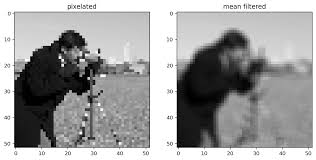

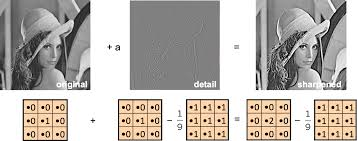

In [15]:
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow from google.colab.patches

# Load an image
image = cv2.imread('/content/drive/MyDrive/download.jpg')
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow

print()
print()

image = cv2.imread('//content//drive//MyDrive//images.jpg')
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow


   - **1.2 Types of Filters**
     - **Linear Filters**: Operate using a weighted sum of pixel values (e.g., Gaussian filter for smoothing).
     - **Non-linear Filters**: Operate based on non-linear operations (e.g., Median filter for noise reduction).

   - **1.3 Filter Kernels**
     - A kernel is a small matrix used to apply effects like blurring or sharpening.
     - Example: Edge detection kernel:
       ```
       [-1, -1, -1]
       [-1,  8, -1]
       [-1, -1, -1]
       ```

   - **1.4 Applying a Gaussian Filter**
   

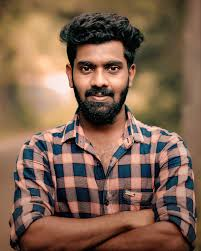


 After apply Guassian Blur


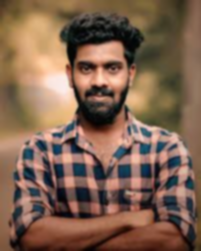

In [22]:
from google.colab.patches import cv2_imshow # Import cv2_imshow from google.colab.patches

# Load an image
image = cv2.imread('/content/drive/MyDrive/images (1).jpg')

cv2_imshow(image)
# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
print("\n After apply Guassian Blur")
# Display the result using cv2_imshow instead of cv2.imshow
cv2_imshow(blurred_image)
#cv2.imshow(blurred_image)  # This line was causing the error
#cv2.waitKey(0)
#cv2.destroyAllWindows()


### **2. Gradients**
   - **2.1 Introduction to Gradients**
     - Gradients represent the rate of change of pixel intensity in an image. They are crucial for edge detection and feature extraction.
     - Example: Detecting edges in an image using gradients.

   - **2.2 Gradient Calculation**
     - **Sobel Operator**: Computes gradients in horizontal and vertical directions.
     - **Prewitt Operator**: Similar to Sobel but with different kernel weights.
     - **Scharr Operator**: Enhanced version of Sobel for better accuracy.

   - **2.3 Gradient Direction and Magnitude**
     - Magnitude: `sqrt(Gx^2 + Gy^2)`
     - Direction: `arctan(Gy / Gx)`

   - **2.4 Edge Detection using Sobel Operator**
     ```python
     import cv2
     import numpy as np

     # Load an image in grayscale
     image = cv2.imread('image.jpg', 0)

     # Apply Sobel operator
     sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
     sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

     # Calculate magnitude
     magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

     # Display the result
     cv2.imshow('Sobel Magnitude', magnitude.astype(np.uint8))
     cv2.waitKey(0)
     cv2.destroyAllWindows()
     ```

---

### **3. Convolution**
   - **3.1 Introduction to Convolution**
     - Convolution is a mathematical operation used to apply filters to images. It involves sliding a kernel over the image and computing the sum of element-wise products.
     - Example: Blurring an image using convolution.

   - **3.2 Convolution Operation**
     - Steps:
       1. Flip the kernel horizontally and vertically.
       2. Slide the kernel over the image.
       3. Compute the sum of element-wise products.
     - Padding: Adding extra pixels around the image to control output size.
     - Stride: Step size for sliding the kernel.

   - **3.3 Applications of Convolution**
     - Blurring: Gaussian kernel.
     - Sharpening: Laplacian kernel.
     - Edge detection: Sobel kernel.

   - **3.4 Convolution using NumPy**
     ```python
     import numpy as np
     from scipy.signal import convolve2d

     # Define a kernel
     kernel = np.array([[1, 0, -1],
                        [1, 0, -1],
                        [1, 0, -1]])

     # Load an image (grayscale)
     image = np.array([[100, 120, 110],
                       [130, 140, 135],
                       [120, 110, 100]])

     # Perform convolution
     result = convolve2d(image, kernel, mode='valid')

     print("Convolution Result:\n", result)
     ```

---

### **4. Correlation**
   - **4.1 Introduction to Correlation**
     - Correlation measures the similarity between two signals (e.g., an image and a template). It is used for template matching and pattern recognition.
     - Example: Finding a specific object in an image.

   - **4.2 Correlation Operation**
     - Steps:
       1. Slide the template over the image.
       2. Compute the sum of element-wise products.
     - Unlike convolution, the kernel is not flipped.

   - **4.3 Applications of Correlation**
     - Template matching: Finding a small image (template) within a larger image.
     - Pattern recognition: Detecting specific patterns in an image.

   - **4.4 Template Matching using Correlation**
     ```python
     import cv2
     import numpy as np

     # Load an image and template
     image = cv2.imread('image.jpg', 0)
     template = cv2.imread('template.jpg', 0)

     # Perform template matching
     result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

     # Get the location of the best match
     min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
     top_left = max_loc

     # Draw a rectangle around the matched region
     h, w = template.shape
     bottom_right = (top_left[0] + w, top_left[1] + h)
     cv2.rectangle(image, top_left, bottom_right, 255, 2)

     # Display the result
     cv2.imshow('Matched Template', image)
     cv2.waitKey(0)
     cv2.destroyAllWindows()
     ```

